In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
from functools import partial
import os 
import imageio 
from IPython.display import Image
from scipy import stats
from scipy.stats.qmc import LatinHypercube as lhs
import sympy

# Visualizing the Mandelbrot set

In [2]:
# Mandelbrot set function
def mandelbrot(c, max_iter):
    z = c
    for i in range(max_iter):
        if abs(z) > 2:
            return i
        z = z*z + c
    return i

The pseudo-true area value of the Mandelbrot set is 1.5179062500000002


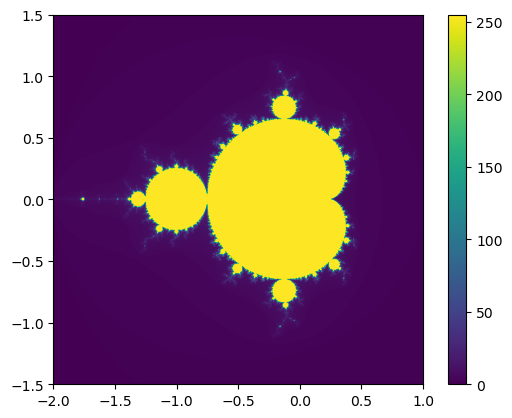

In [46]:
# Parameters 
width, height = 800, 800
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
max_iter = 256

# Create an empty canvas
canvas = np.zeros((width, height))

# Initialize "true" Mandelbrot area (will be used as a reference to evaluate Monte Carlo)
pseudo_true_area = 0

# Generate the Mandelbrot set
for x in range(width):
    for y in range(height):
        # Calculate complex number (Mandelbrot input)
        zx, zy = x * (xmax - xmin) / (width - 1) + xmin, y * (ymax - ymin) / (height - 1) + ymin
        c = zx + zy * 1j

        # Set the pixel value based on the number of iterations
        pixel_value = mandelbrot(c, max_iter)
        canvas[y, x] = pixel_value

        if pixel_value == (max_iter - 1): pseudo_true_area +=1

pseudo_true_area = pseudo_true_area/(width * height) * (xmax - xmin) * (ymax - ymin)
print(f'The pseudo-true area value of the Mandelbrot set is {pseudo_true_area}')

# Create a colored image of the Mandelbrot set
plt.imshow(canvas, extent=(xmin, xmax, ymin, ymax))
plt.colorbar()
plt.show()

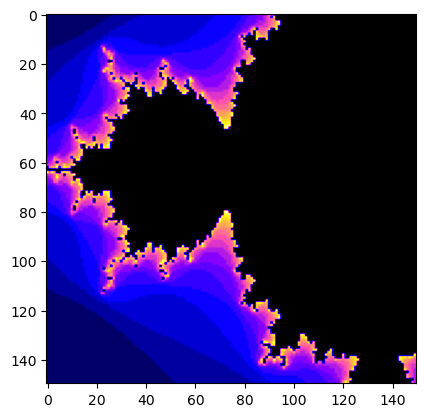

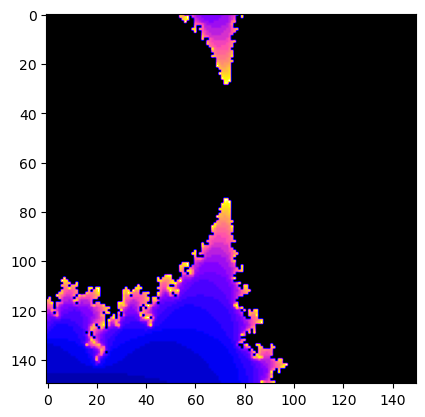

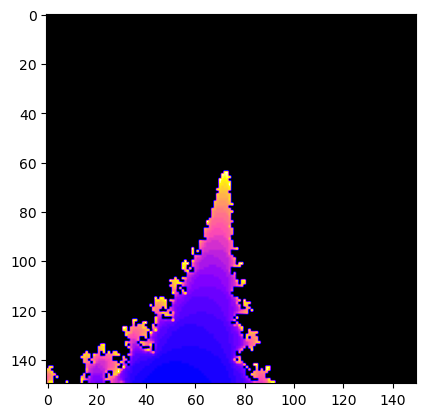

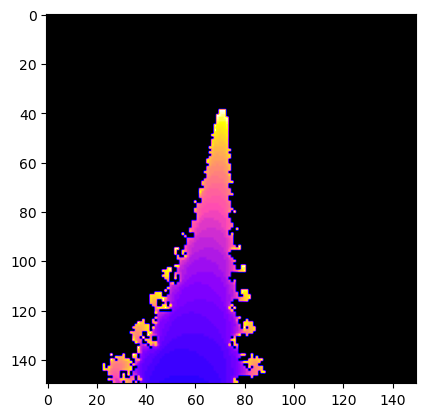

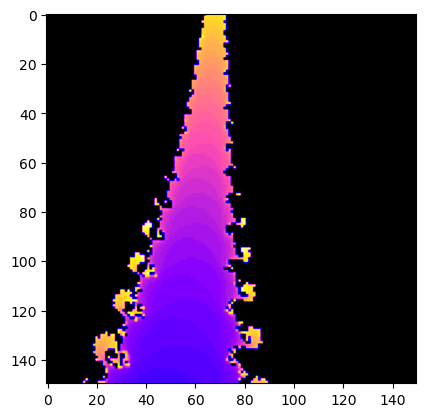

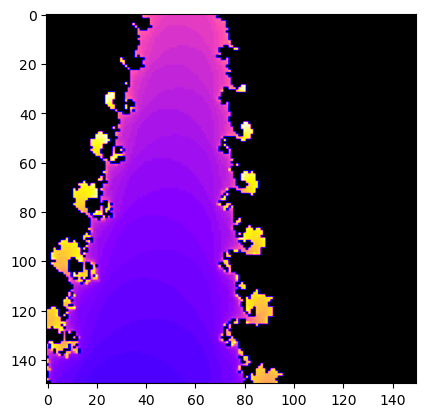

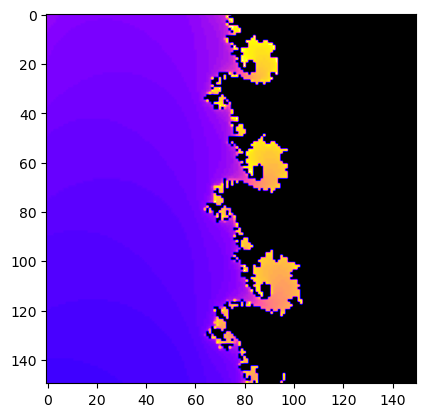

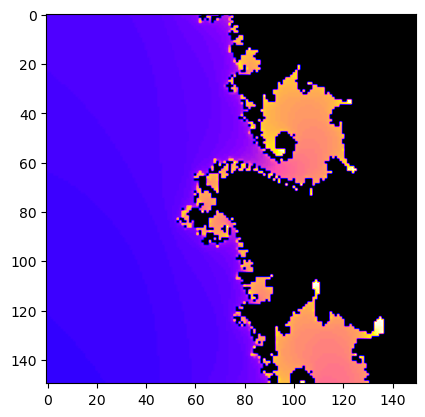

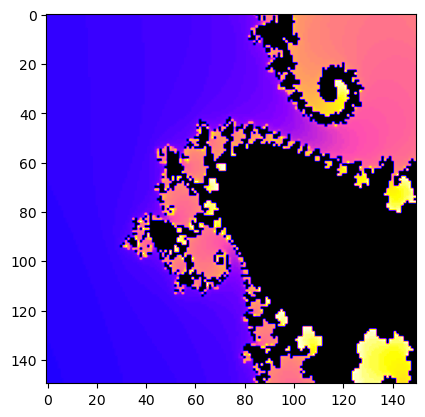

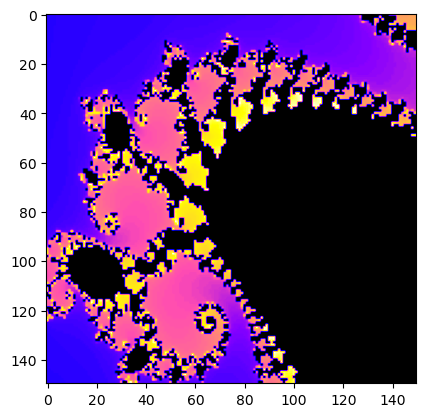

In [4]:
def func(z, c):
    """
    Function to calculate the next value 'z' in the iteration for the Mandelbrot set.

    Input:
    - z: Current complex number.
    - c: Complex number for the current pixel.

    Output:
    - Updated value 'z' using the formula z^2 + c.
    """

    return z**2 + c  # where c is the complex number

def diverge(c, max_iterations=50):
    """
    Function to determine whether a given complex number 'c' diverges within a maximum number of iterations.

    Input:
    - c: Complex number to be checked for divergence.
    - max_iterations: Maximum number of iterations (default is 50).

    Output:
    - Number of iterations until divergence or 0 if it doesn't diverge within the specified limit.
    """
    c = complex(*c)
    z = 0

    for i in range(max_iterations):
        z = z**2 + c

        # Set a boundary condition if it escapes
        # If the combination of the real part and imaginary part exceeds 4
        if z.real**2 + z.imag**2 >= 4:
            return i
    return 0

def construct_grid(bound_box, resolution=150):  # Define minimum and maximum of the system
    """
    Function to create a grid of coordinates within a specified bounding box.

    Input:
    - bound_box: Tuple (x_min, x_max, y_min, y_max) defining the boundary of the system.
    - resolution: Resolution for the grid (default is 150).

    Output:
    - 2D array of coordinates covering the specified bounding box.
    """

    x_min, x_max, y_min, y_max = bound_box
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    coords = np.c_[xx.ravel(), yy.ravel()]
    return coords

def construct_mandelbrot(coords, div, plot=True, filename=False):
    """
    Function to construct and plot the Mandelbrot set.

    Input:
    - coords: Array of complex coordinates.
    - div: Function to check divergence for each coordinate.
    - plot: Flag to display the Mandelbrot set (default is True).
    - filename: Optional filename to save the plot (default is False).

    Output:
    - 2D array representing the Mandelbrot set. If 'plot' is True, it also displays or saves the image.
    """

    mandel_brot = np.array([div(c) for c in coords])
    # Reshape to fit into a grid for plotting
    resolution = int(np.sqrt(coords.shape[0]))
    mandel_brot = mandel_brot.reshape(resolution, resolution)

    if plot:
        plt.imshow(mandel_brot, cmap='gnuplot2')        
        if filename:
            plt.savefig(f"figs/{filename}.png")
        plt.show()

    return mandel_brot

def zoom(bound_box, point, scale_factor=2):
    """
    Function to zoom in on a specific point within the Mandelbrot set.

    Input:
    - bound_box: Tuple (x_min, x_max, y_min, y_max) defining the current bounding box.
    - point: Center point for the zoom operation (x, y).
    - scale_factor: Factor to adjust the zoom (default is 2).

    Output:
    - Updated bounding box after the zoom operation.
    """
    x, y = point
    x_min, x_max, y_min, y_max = bound_box

    width = (x_max - x_min) / scale_factor  # Scale the zoom
    height = (y_max - y_min) / scale_factor

    return x - width/2, x + width/2, y - height/2, y + height/2

def padding(num, num_zeros= 3):
    l = len(str(num))
    return (num_zeros - l)* '0' + str(num)

p = -0.748, 0.1
zoom_factor = 2
bound_box = (-2.1, 1, -1.3, 1.3)
div = partial(diverge, max_iterations=20)
for i in range(10):
    # At each point, update the bound box and recompute the Mandelbrot set
    bound_box = zoom(bound_box, p, scale_factor=zoom_factor)
    coords = construct_grid(bound_box)
    div = partial(diverge, max_iterations = 20 + i*10)
    filename = f"mandel_brot_zoom_{padding(i*zoom_factor)}"
    construct_mandelbrot(coords, div, filename = filename)

In [5]:
# Specify the folder where your image files are located
folder_path = 'figs'  # Change this to the correct folder path

# List your image files in the specified folder
image_paths = [
    os.path.join(folder_path, 'mandel_brot_zoom_000.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_002.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_004.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_006.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_008.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_010.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_012.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_014.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_016.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_018.png')
]

output_gif = 'mandelbrot_zoom.gif'

# Create the GIF from the image files
with imageio.get_writer(output_gif, mode='I') as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)

# Display the created GIF
output_gif

/tmp/ipykernel_40223/4184218398.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


'mandelbrot_zoom.gif'

# Computing the Area of the Mandelbrot set

In [25]:
def get_prime_squares(max_value):
    """
    This function outputs prime square values between 1 to some specified maximum value.

    Input: upper bound of prime square value

    Output: list of prime squares from 1 to the upper bound (or up to closest prime square below the upper bound)
    """
    # Get a sufficient amount of prime numbers for testing
    primes = list(sympy.primerange(0.5*(max_value)))
    # Add a prime square if within bounds
    prime_squares = [p**2 for p in primes if p**2 < max_value]

    return prime_squares


# Define a Latin Hypercube Sampling function
def latin_hypercube_sampling(n, random_state=None, visualize = False, orthogonal_sampling = False):
    """
    Function to create n samples in a 2 dimensional space.
    Input:
    - n: number of samples
    - visualization: True or False (False by default)
    - orthogonal sampling: True or False (False by default)
    (assumes variable ranges specified globally)

    Output:
    - x_samples
    - y_samples
    - Visualization of samples if parameter visualize = True
    """
    
    # Use scipy package to generate latin hypercube samples
    if orthogonal_sampling == True:
        strength = 2
    else:
        strength = 1
    
    latin_hypercube = lhs(d=2, strength = strength, seed = random_state)
    samples = latin_hypercube.random(n)

    # Scale the samples to the specified variable ranges
    x_samples = xmin + samples[:, 0] * (xmax - xmin)
    y_samples = ymin + samples[:, 1] * (ymax - ymin)

    #Shows drawn samples on a two dimensional grid
    if visualize:
        plt.scatter(x_samples, y_samples, s=10)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Latin Hypercube Sampling Grid")
        grid_x = np.linspace(xmin, xmax, n+1)
        grid_y = np.linspace(ymin, ymax, n+1)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.xticks(grid_x)
        plt.yticks(grid_y)
        plt.show()

    # Return the x and y samples
    return x_samples, y_samples

In [56]:
def calculate_reference_areas(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, sampling_method = 'Uniform Sampling'):
    reference_areas = np.zeros((len(s_values), num_runs))

    for run in range(num_runs):
        np.random.seed(run)

        for idx, s in enumerate(s_values):
            reference_s = s
            reference_i_max = i_max
            reference_area = 0.0
            
            #Sample
            if sampling_method == 'Uniform Sampling':
                x_samples = np.random.uniform(xmin, xmax, reference_s)
                y_samples = np.random.uniform(ymin, ymax, reference_s)
            elif sampling_method == 'Latin Hypercube Sampling':
                x_samples, y_samples = latin_hypercube_sampling(s, random_state=run)
            elif sampling_method == 'Orthogonal Sampling':
                x_samples, y_samples = latin_hypercube_sampling(s, random_state=run, orthogonal_sampling=True)

                
            for x, y in zip(x_samples, y_samples):
                c = complex(x, y)
                z = c

                for _ in range(reference_i_max):
                    if abs(z) > 2.0:
                        break
                    z = z * z + c
                else:
                    reference_area += 1
                    
            reference_area = (reference_area / reference_s) * (xmax - xmin) * (ymax - ymin)
            reference_areas[idx, run] = reference_area

    return reference_areas


def calculate_area_estimations(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, reference_areas, sampling_method = 'Uniform Sampling'):
    area_estimations_sum = np.zeros((i_max, len(s_values), num_runs))

    for run in range(num_runs):
        np.random.seed(run)
        # print(f'run {run}/{num_runs}')
        for idx, s in enumerate(s_values):
            # print(f'sample size {s}')
            for j in range(1, i_max + 1):
                AM = 0.0
        
                if sampling_method == 'Uniform Sampling':
                    x_samples = np.random.uniform(xmin, xmax, s)
                    y_samples = np.random.uniform(ymin, ymax, s)
                elif sampling_method == 'Latin Hypercube Sampling':
                    x_samples, y_samples = latin_hypercube_sampling(s, random_state=run)
                elif sampling_method == 'Orthogonal Sampling':
                    x_samples, y_samples = latin_hypercube_sampling(s, random_state=run, orthogonal_sampling=True)

                
                for x, y in zip(x_samples, y_samples):
                    c = complex(x, y)
                    z = c
                    
                    for _ in range(j):
                        if abs(z) > 2.0:
                            break
                        z = z * z + c
                    else:
                        AM += 1
                        
                AM = (AM / s) * (xmax - xmin) * (ymax - ymin)
                area_estimations_sum[j - 1, idx, run] = AM

    return area_estimations_sum

In [101]:
#Orthogonal sampling only takes samples of size p^2 where p is a prime.
#Compute some potential sample sizes:
get_prime_squares(1400)

[4, 9, 25, 49, 121, 169, 289, 361, 529, 841, 961, 1369]

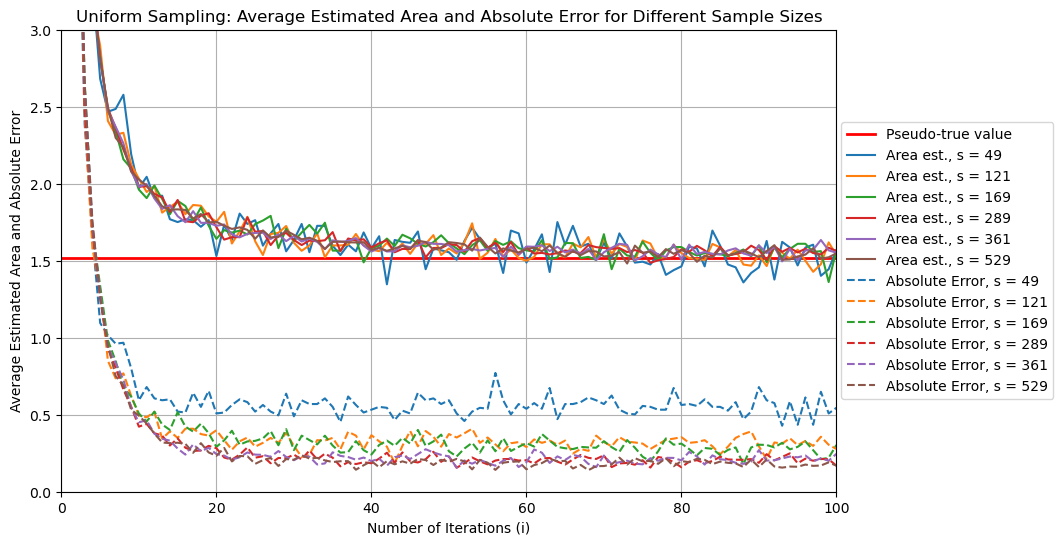

<Figure size 640x480 with 0 Axes>

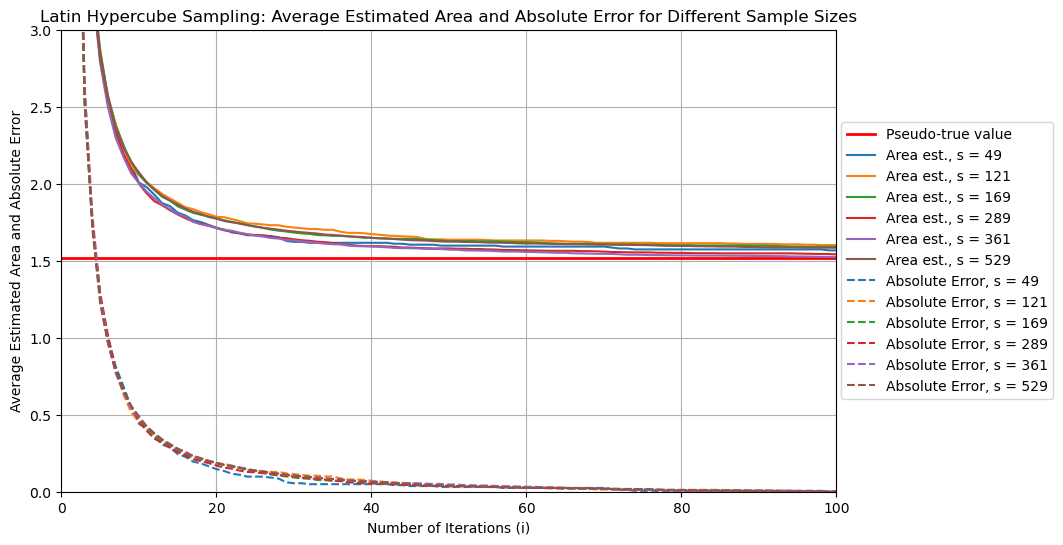

<Figure size 640x480 with 0 Axes>

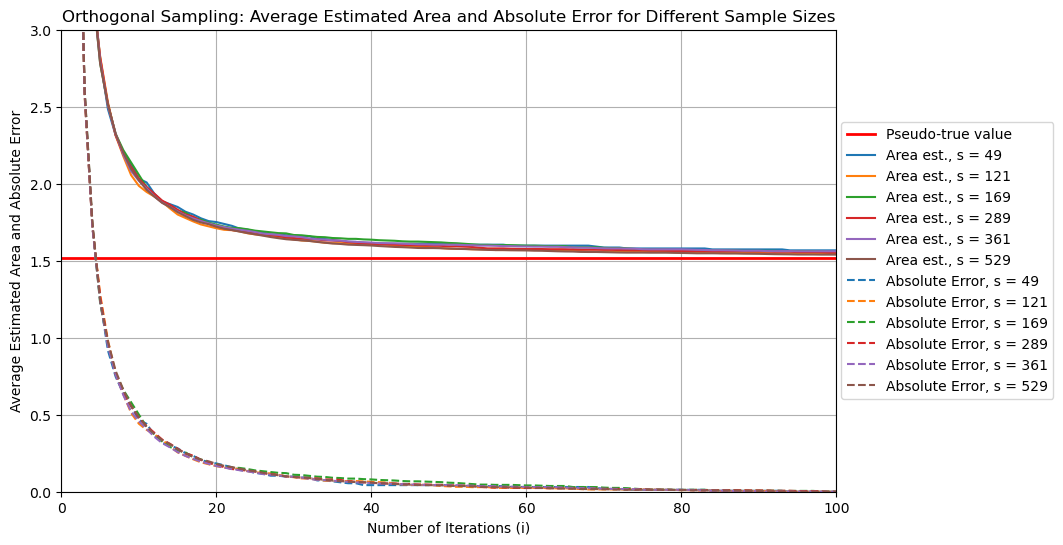

<Figure size 640x480 with 0 Axes>

In [120]:
###Estimate Mandelbrot Area and calculate the absolute error using different sampling methods
# Define the parameters
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
i_max = 100
s_values = [49, 121, 169, 289, 361, 529] #Orthogonal Sampling only works on sample sizes of prime square values
num_runs = 30
sampling_methods = ['Uniform Sampling', 'Latin Hypercube Sampling', 'Orthogonal Sampling']

#Initiate variabes storing data for all sampling methods
all_average_areas = []
all_absolute_errors = []

# Get colors for the plots
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


for sampling_method in sampling_methods:

    # Calculate reference areas
    reference_areas = calculate_reference_areas(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, sampling_method = sampling_method)

    # Calculate area estimations
    area_estimations_sum = calculate_area_estimations(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, reference_areas, sampling_method = sampling_method)

    # Calculate the reference area averages for each 's' value
    reference_areas_avg = np.mean(reference_areas, axis=1)

    plt.figure(figsize=(10, 6))

    # Calculate the average estimated area for each sample size
    average_area_by_sample = np.mean(area_estimations_sum, axis=2)
    all_average_areas.append(average_area_by_sample)
    
    # Plotting pseudo-true value line as reference
    plt.axhline(y=pseudo_true_area, color='r', label='Pseudo-true value', linewidth=2)

    # Plotting the estimated area for different sample sizes
    for idx, s in enumerate(s_values):
        plt.plot(range(1, i_max + 1), average_area_by_sample[:, idx], label=f'Area est., s = {s}', color=color_cycle[idx])

    # Reshape the reference_areas array
    reshaped_reference_areas = reference_areas.reshape(1, len(s_values), num_runs)

    # Calculate the absolute error based on s_values
    absolute_errors = np.abs(area_estimations_sum - reshaped_reference_areas)
    all_absolute_errors.append(absolute_errors)

    # Plot the absolute errors for different s_values
    for i, s in enumerate(s_values):
        plt.plot(range(1, i_max + 1), absolute_errors[:, i, :].mean(axis=1), color=color_cycle[i], linestyle='--', label=f'Absolute Error, s = {s}')

    plt.xlabel('Number of Iterations (i)')
    plt.ylabel('Average Estimated Area and Absolute Error')
    plt.title(sampling_method + ': Average Estimated Area and Absolute Error for Different Sample Sizes')
    plt.ylim(bottom=0, top=3)
    plt.xlim(left=0, right=100)
    plt.legend(loc='upper right', bbox_to_anchor=(1.28, 0.8), borderaxespad=0.)
    plt.grid()
    plt.show()
    plt.savefig(f'{sampling_method}', dpi=300)

# Method to improve convergence : Importance Sampling

In [121]:
# Define the weighting functions

# Higher weight near the boundary
def weighting_function(x, y, a, xmin, xmax, ymin, ymax):
    distance_to_boundary = np.sqrt(x**2 + y**2)
    return np.exp(a * distance_to_boundary)

# Quadratic weighting function
def gaussian_weighting(x, y, a, xmin, xmax, ymin, ymax):
    # Calculate the maximum distance from the origin in the rectangular region
    max_distance = np.sqrt(max((xmax - xmin)**2, (ymax - ymin)**2))
    # Quadratic weighting function
    return np.exp(-a * (x**2 + y**2) / max_distance**2)

# Radial Basis Function (RBF) Weighting Function
def rbf_weighting(x, y, a, xmin, xmax, ymin, ymax):
    # Calculate the maximum distance from the origin in the rectangular region
    max_distance = np.sqrt(max((xmax - xmin)**2, (ymax - ymin)**2))
    # RBF weighting function
    return np.exp(-a * np.sqrt((x - (xmin + xmax) / 2)**2 + (y - (ymin + ymax) / 2)**2) / max_distance)


In [122]:
def calculate_area_estimations_with_importance_sampling(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, total_area, weighting_function):
    area_estimations_sum = np.zeros((i_max, len(s_values), num_runs))
    for run in range(num_runs):
        np.random.seed(run)

        for idx, s in enumerate(s_values):
            for j in range(1, i_max + 1):
                AM = 0.0
                for _ in range(s):
                    # Sample according to the weighting function
                    x = np.random.uniform(xmin, xmax)
                    y = np.random.uniform(ymin, ymax)
                    weight = weighting_function(x, y, a, xmin, xmax, ymin, ymax)

                    c = complex(x, y)
                    z = c
                    for _ in range(j):
                        if abs(z) > 2.0:
                            break
                        z = z * z + c
                    else:
                        AM += weight
                AM = (AM / s) * total_area[idx]
                area_estimations_sum[j - 1, idx, run] += AM
                
    return area_estimations_sum

In [123]:
# Set the parameters
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
i_max = 100
s_values = [49, 121, 169, 289, 361, 529] #Orthogonal Sampling only works on sample sizes of prime square values
num_runs = 30
total_area = np.ones(len(s_values)) * (xmax - xmin) * (ymax - ymin)

# Calculate the maximum distance from the origin in the rectangular region; used in quadratic weighting
max_distance = np.sqrt(max((xmax - xmin)**2, (ymax - ymin)**2))

# Adjust the a value based on the desired spread of influence; used in quadratic weighting
a = 1.0 / (2 * max_distance)

In [124]:
# Calculate area estimations with importance sampling using the quadratic weighting function
area_estimations_edge = calculate_area_estimations_with_importance_sampling(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, total_area, weighting_function)

# Calculate area estimations with importance sampling using the quadratic weighting function
area_estimations_quad = calculate_area_estimations_with_importance_sampling(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, total_area, gaussian_weighting)

# Calculate area estimations with importance sampling using the quadratic weighting function
area_estimations_rbf = calculate_area_estimations_with_importance_sampling(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, total_area, rbf_weighting)

In [125]:
# Calculate reference areas
reference_areas = calculate_reference_areas(xmin, xmax, ymin, ymax, i_max, s_values, num_runs)

# Calculate the reference area averages for each 's' value
reference_areas_avg = np.mean(reference_areas, axis=1)

In [126]:
# Calculate the average estimated area for each sample size
average_area_edge = np.mean(area_estimations_edge, axis=2)
average_area_quad = np.mean(area_estimations_quad, axis=2)
average_area_rbf = np.mean(area_estimations_rbf, axis=2)

#Store data
all_average_areas.append(average_area_edge)
all_average_areas.append(average_area_quad)
all_average_areas.append(average_area_rbf)

# Calculate the absolute error for each weighting function
error_edge = np.abs(average_area_edge - reference_areas_avg)
error_quad = np.abs(average_area_quad - reference_areas_avg)
error_rbf = np.abs(average_area_rbf - reference_areas_avg)

#Store data
all_absolute_errors.append(error_edge)
all_absolute_errors.append(error_quad)
all_absolute_errors.append(error_rbf)

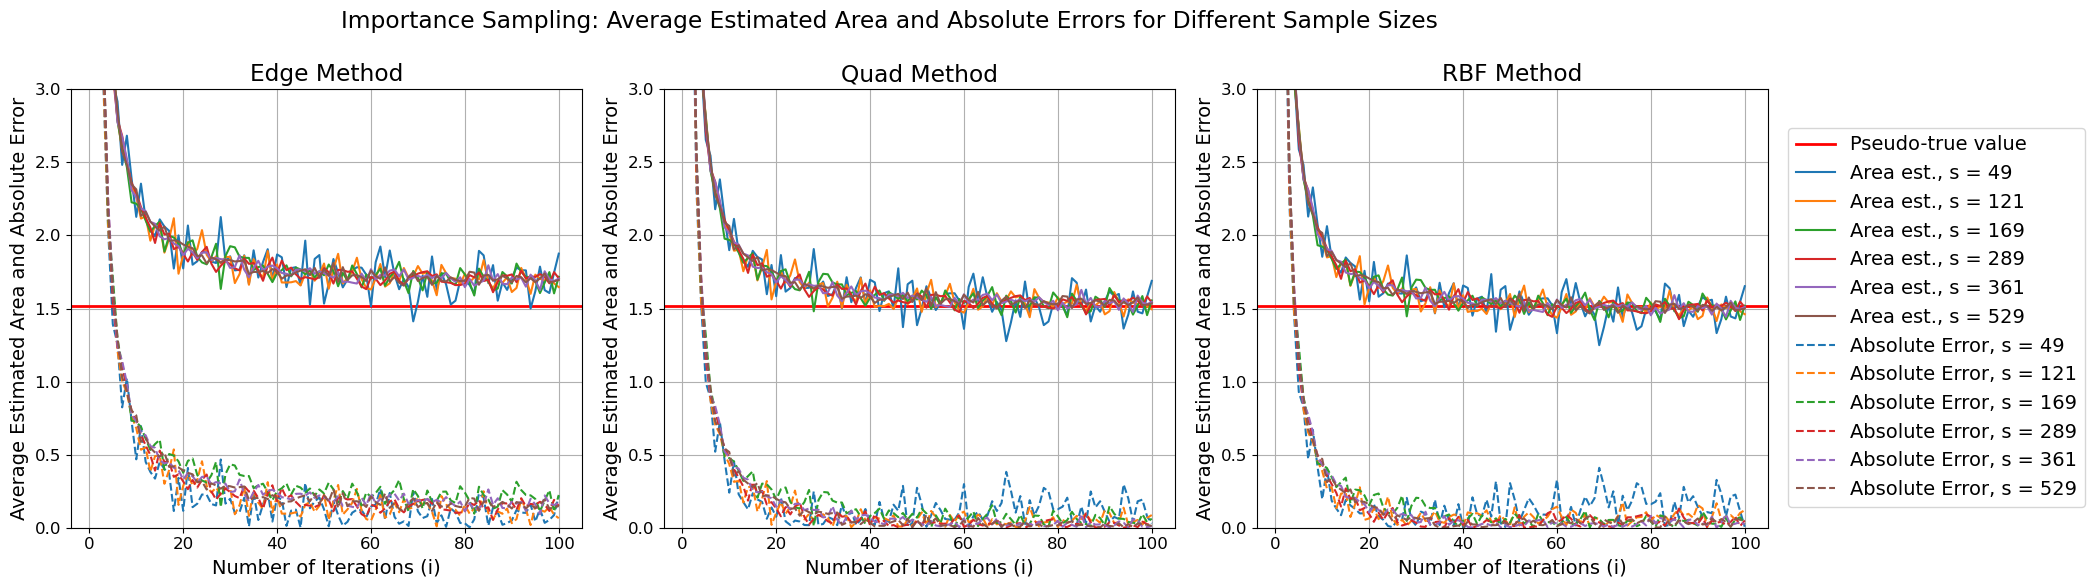

<Figure size 640x480 with 0 Axes>

In [151]:
# Set up subplots, colors
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({'font.size': 14})

#Plot the reference area line with pseudo-true value
axes[0].axhline(y=pseudo_true_area, color='r', label='Pseudo-true value', linewidth=2)
axes[1].axhline(y=pseudo_true_area, color='r', linewidth=2)
axes[2].axhline(y=pseudo_true_area, color='r', linewidth=2)

# Plotting the estimated area for different sample sizes in each subplot
for idx, s in enumerate(s_values):
    axes[0].plot(range(1, i_max + 1), average_area_edge[:, idx], label=f'Area est., s = {s}', color = color_cycle[idx])
    axes[1].plot(range(1, i_max + 1), average_area_quad[:, idx], color = color_cycle[idx])
    axes[2].plot(range(1, i_max + 1), average_area_rbf[:, idx], color = color_cycle[idx])

# Set common labels and title
for ax in axes:
    ax.set_xlabel('Number of Iterations (i)')
    ax.set_ylabel('Average Estimated Area and Absolute Error')
    ax.set_ylim(bottom = 0, top = 3)
    ax.tick_params(axis='both', labelsize=12) #Increase font size
    ax.grid()

# Set individual titles
axes[0].set_title('Edge Method')
axes[1].set_title('Quad Method')
axes[2].set_title('RBF Method')

plt.suptitle('Importance Sampling: Average Estimated Area and Absolute Errors for Different Sample Sizes')

# Sample sizes
s_values = [49, 121, 169, 289, 361, 529] #Orthogonal Sampling only works on sample sizes of prime square values

# Plotting the absolute error

# Plot for Edge Method
for idx, s in enumerate(s_values):
    axes[0].plot(range(1, i_max + 1), error_edge[:, idx], label=f'Absolute Error, s = {s}', linestyle='--', color = color_cycle[idx])

# Plot for Quad Method
for idx, s in enumerate(s_values):
    axes[1].plot(range(1, i_max + 1), error_quad[:, idx], linestyle='--', color = color_cycle[idx])

# Plot for RBF Method
for idx, s in enumerate(s_values):
    axes[2].plot(range(1, i_max + 1), error_rbf[:, idx], linestyle='--', color = color_cycle[idx])

fig.legend(loc='upper right', bbox_to_anchor=(1.17, 0.8))
plt.tight_layout()
plt.show()
plt.savefig('importance_sampling', dpi=300)


# Compare across sampling methods

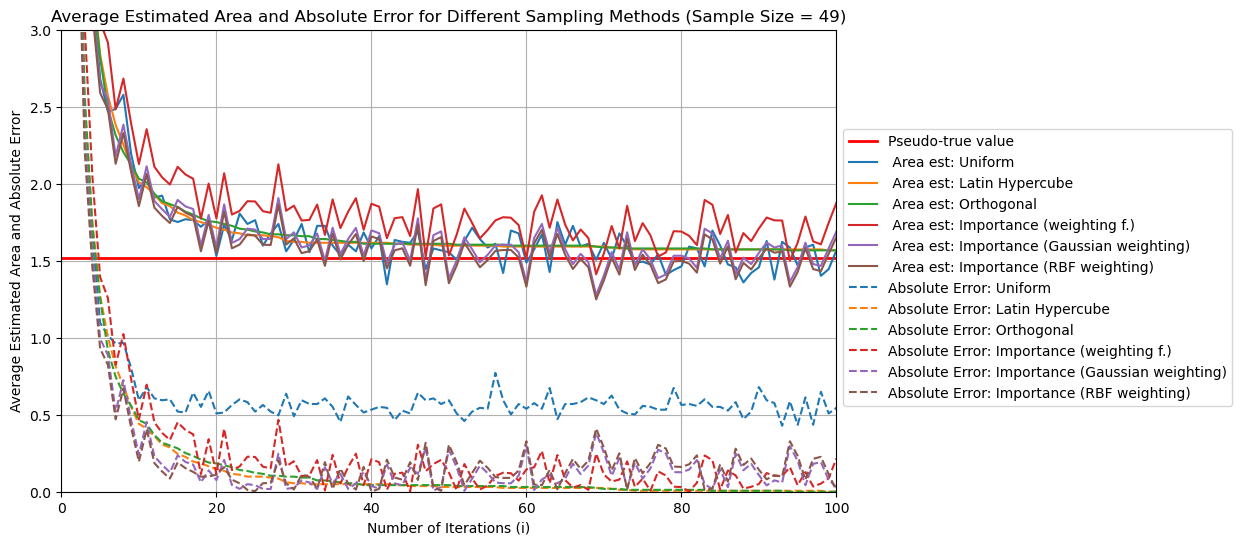

In [171]:
#Plot areas and errors for different sampling methods, sample size fixed

#Set index of desired sample (refer back to s_values)
sample_idx  = 0

legend_labels = ['Uniform', 'Latin Hypercube', 'Orthogonal', 'Importance (weighting f.)', 'Importance (Gaussian weighting)', 'Importance (RBF weighting)']

# Plotting prep
plt.figure(figsize=(10, 6))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({'font.size': 10})

#Plot the reference area value
plt.axhline(y=pseudo_true_area, color='r', label='Pseudo-true value', linewidth=2)

#Areas of different sampling methods for s=49
for idx, area in enumerate(all_average_areas):
    plt.plot(range(1, i_max+1), area[:, sample_idx], color = color_cycle[idx], label = f' Area est: {legend_labels[idx]}')


#Absolute errors of different sampling methods for s=49
for idx, errors in enumerate(all_absolute_errors):
    if len(errors.shape) == 3:
        plt.plot(range(1, i_max+1), errors.mean(axis=2)[:, sample_idx], color = color_cycle[idx], linestyle = '--', label = f'Absolute Error: {legend_labels[idx]}')
    else:
        plt.plot(range(1, i_max+1), errors[:, sample_idx], color = color_cycle[idx], linestyle = '--', label = f'Absolute Error: {legend_labels[idx]}')


plt.xlabel('Number of Iterations (i)')
plt.ylabel('Average Estimated Area and Absolute Error')
plt.title(f'Average Estimated Area and Absolute Error for Different Sampling Methods (Sample Size = {s_values[sample_idx]})')
plt.ylim(bottom=0, top=3)
plt.xlim(left=0, right=100)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.52, 0.8))
plt.grid()
plt.savefig(f'method_comparison_s{s_values[sample_idx]}', dpi=300)
plt.show()

